In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

In [2]:
os.chdir("D:\Lohith\DA\Handson\Risk_Analytics")

In [3]:
Client_History = pd.read_csv("previous_application.csv")   #Reading the Client History
Description = pd.read_csv(r"columns_description.csv",encoding='cp1252')
Client_Data = pd.read_csv("Client_data.csv") #Reading the Present Client Data

##### By Default it will show only 20 columns,Since we have more then 20 column, this function is used

In [4]:
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [5]:
Description.drop(columns=["Unnamed: 0","Special"], axis =1, inplace = True)  # Description of our Columns
Description[122:]

,Table,Row,Description
122,previous_application.csv,SK_ID_PREV,ID of previous credit in Home credit related t...
123,previous_application.csv,SK_ID_CURR,ID of loan in our sample
124,previous_application.csv,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa..."
125,previous_application.csv,AMT_ANNUITY,Annuity of previous application
126,previous_application.csv,AMT_APPLICATION,For how much credit did client ask on the prev...
127,previous_application.csv,AMT_CREDIT,Final credit amount on the previous applicatio...
128,previous_application.csv,AMT_DOWN_PAYMENT,Down payment on the previous application
129,previous_application.csv,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...
130,previous_application.csv,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...
131,previous_application.csv,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...


In [6]:
Client_History.head(5) # Checking the top 5 records

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
Client_Data.head(5) # Checking the top 5 records

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,Age,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,25,Working,Secondary / secondary special,Single / not married,House / apartment,1.7,5.8,1,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,52,Working,Secondary / secondary special,Single / not married,House / apartment,0.6,6.9,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,52,Working,Secondary / secondary special,Civil marriage,House / apartment,8.3,6.7,1,1,0,1,0,2.0,2,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,54,Working,Secondary / secondary special,Single / not married,House / apartment,8.3,9.5,1,1,0,1,0,1.0,2,2,THURSDAY,11,0,1,1,Religion,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
print("Client_History: ",Client_History.shape)

Client_History:  (1670214, 37)


In [9]:
print("Client_Data: ",Client_Data.shape)

Client_Data:  (305180, 58)


##### Drop the columns with missing vales more than 50%

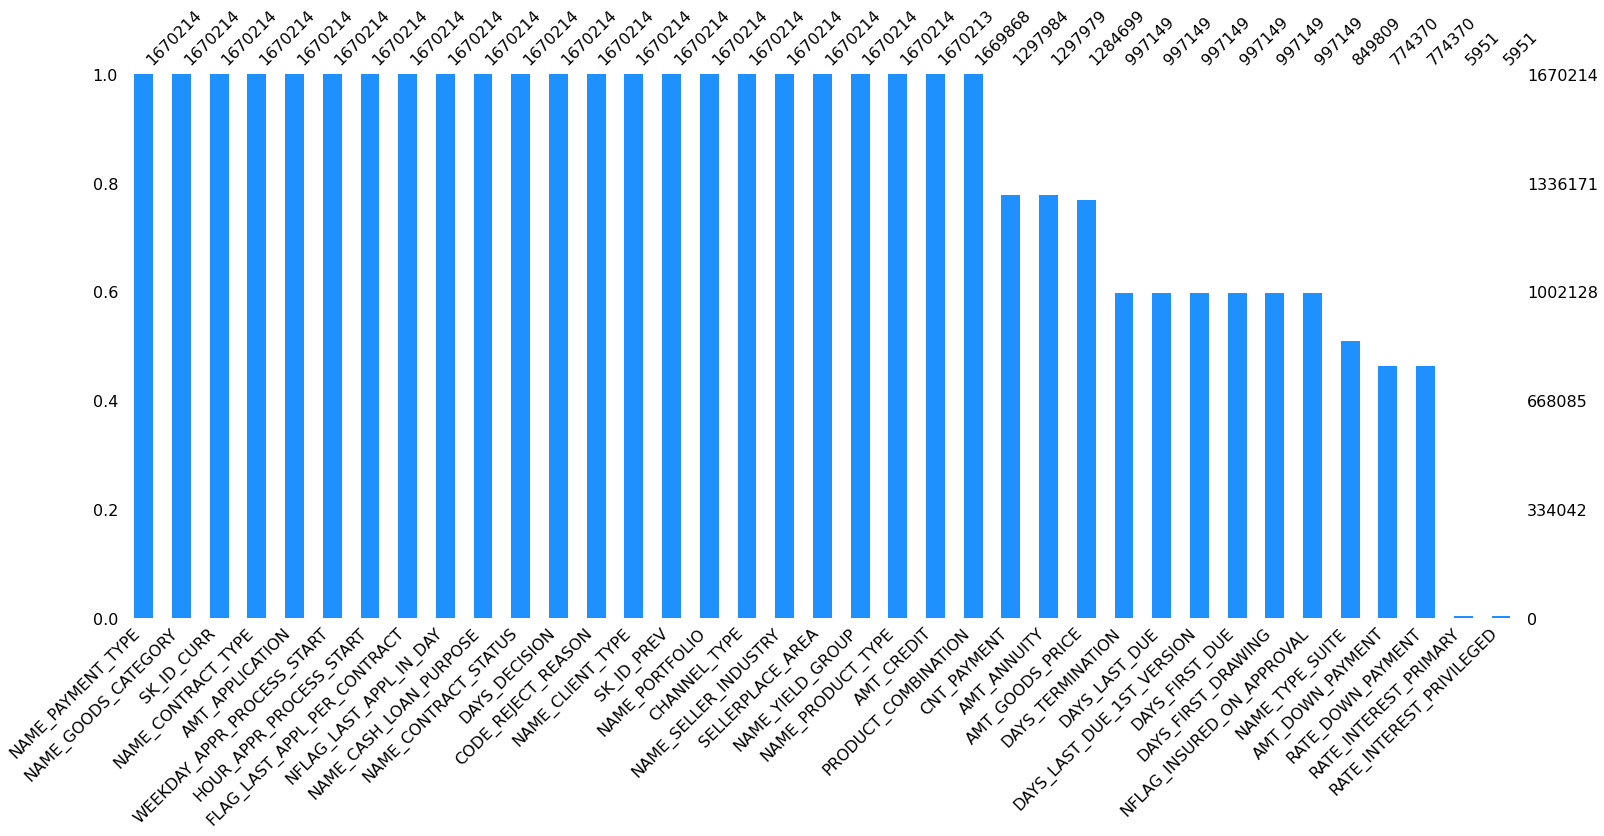

In [10]:
msno.bar(Client_History,sort = "descending",color="dodgerblue")

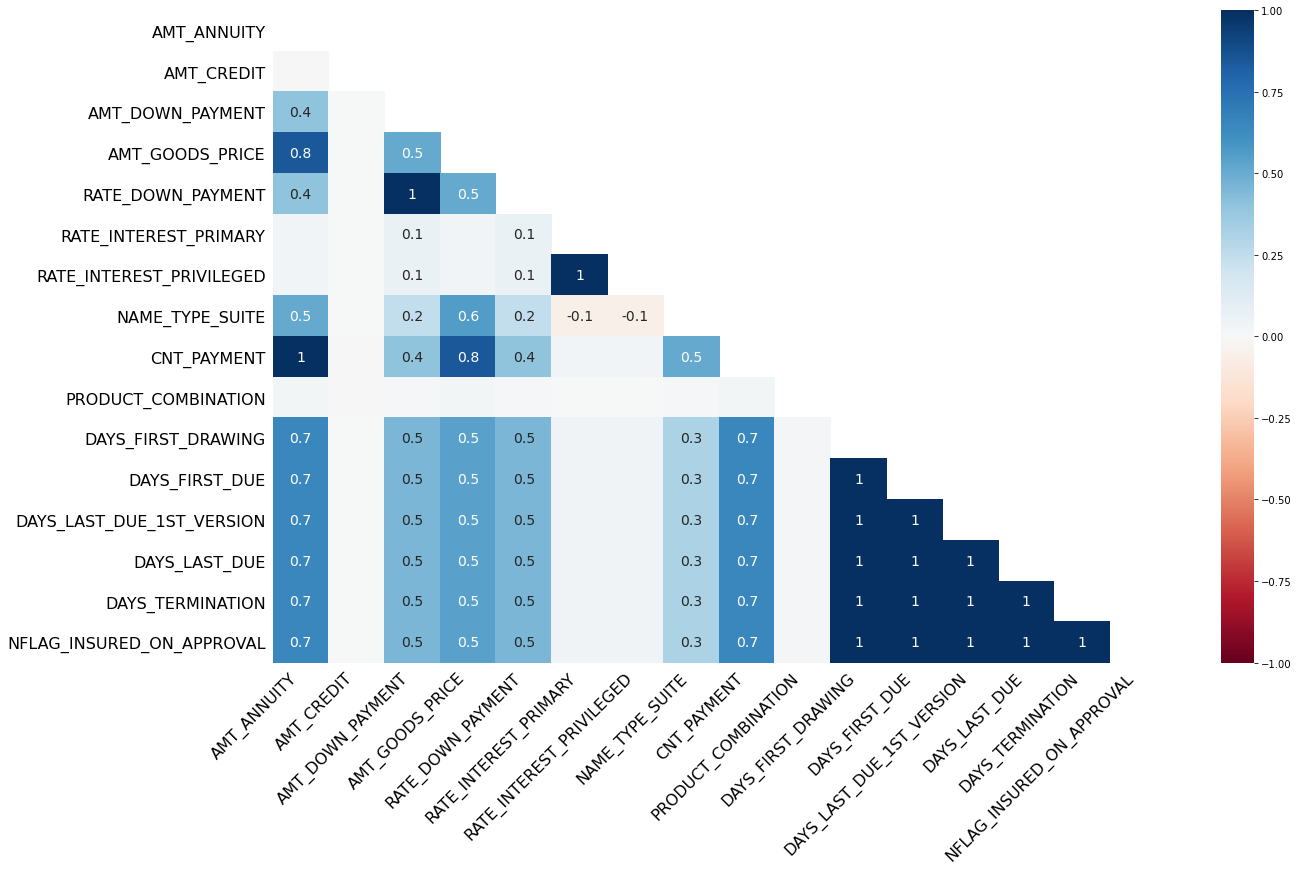

In [11]:
msno.heatmap(Client_History)

* The reason for high Correlation between these columns is due to similar values in most of the corresponding columns.
* We have two option,
    (a)Drop the rows with null values.
    (b)Drop the Columns as there were 40% missing values.
    (C)To check why these are null and whether there is any relation between contract Status.

In [12]:
Client_History["NAME_CONTRACT_STATUS"].unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [13]:
Client_History.loc[(Client_History["NAME_CONTRACT_STATUS"]=='Refused') | (Client_History["NAME_CONTRACT_STATUS"]=='Canceled') | (Client_History["NAME_CONTRACT_STATUS"]=='Unused offer'),["NAME_CONTRACT_STATUS","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]].head(15)

,NAME_CONTRACT_STATUS,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
4,Refused,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,NaN,NaN,NaN
6,Canceled,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Canceled,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Canceled,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Canceled,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Refused,4666.500,45000.0,49455.0,NaN,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
20,Refused,25454.025,450000.0,491580.0,NaN,450000.0,NaN,NaN,NaN,NaN,NaN,NaN
22,Refused,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Refused,39475.305,1129500.0,1277104.5,NaN,1129500.0,NaN,NaN,NaN,NaN,NaN,NaN
24,Canceled,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Client_History.loc[((Client_History["NAME_CONTRACT_STATUS"]=='Approved') & ((Client_History["AMT_APPLICATION"]==0) | (Client_History["AMT_CREDIT"]==0))),["NAME_CONTRACT_STATUS"]].count()

NAME_CONTRACT_STATUS    45304
dtype: int64

In [15]:
Client_History.loc[(Client_History["NAME_CONTRACT_STATUS"]=='Refused'),["NAME_CONTRACT_STATUS"]].count()

NAME_CONTRACT_STATUS    290678
dtype: int64

In [16]:
Client_History.loc[Client_History["NAME_CONTRACT_STATUS"]=='Canceled',["NAME_CONTRACT_STATUS"]].count()

NAME_CONTRACT_STATUS    316319
dtype: int64

In [17]:
Client_History.loc[(Client_History["NAME_CONTRACT_STATUS"]=='Unused offer'),["NAME_CONTRACT_STATUS"]].count()

NAME_CONTRACT_STATUS    26436
dtype: int64

In [18]:
Client_History.loc[(Client_History["NAME_CONTRACT_STATUS"]=='Refused') | (Client_History["NAME_CONTRACT_STATUS"]=='Canceled') | (Client_History["NAME_CONTRACT_STATUS"]=='Unused offer'),["NAME_CONTRACT_STATUS"]].count()

NAME_CONTRACT_STATUS    633433
dtype: int64

In [19]:
Client_History["AMT_ANNUITY"].isnull().sum()

372235

In [20]:
Client_History["DAYS_FIRST_DRAWING"].isnull().sum()

673065

In [21]:
#Client_History1 = Client_History.copy()

In [22]:
Approved_Missings = Client_History.loc[(Client_History["NAME_CONTRACT_STATUS"]=='Approved') & ((Client_History["DAYS_FIRST_DRAWING"].isna() ==True) | (Client_History["AMT_ANNUITY"].isna() ==True) | (Client_History["AMT_GOODS_PRICE"].isna() ==True) | (Client_History["CNT_PAYMENT"].isna() ==True) | (Client_History["AMT_APPLICATION"]==0) | (Client_History["AMT_CREDIT"]==0) | (Client_History["AMT_APPLICATION"].isna()==True) | (Client_History["AMT_CREDIT"].isna()==True))].index

In [23]:
len(Approved_Missings)

84027

In [24]:
Client_History.drop(Approved_Missings,inplace=True)

In [25]:
Client_History.drop(columns = ["RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","RATE_DOWN_PAYMENT","AMT_DOWN_PAYMENT","DAYS_LAST_DUE_1ST_VERSION","SELLERPLACE_AREA"],axis=1,inplace =True)

In [26]:
Client_History.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372227
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                342680
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                763394
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372226
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

In [27]:
Client_History.shape

(1586187, 31)

* Imputing null values with mode in below columns

In [28]:
Client_History["NAME_TYPE_SUITE"].fillna(value="Unaccompanied",inplace=True)

In [29]:
#Client_History["NFLAG_INSURED_ON_APPROVAL"].fillna(Client_History["NFLAG_INSURED_ON_APPROVAL"].mode(),inplace=True)

In [30]:
Client_History.fillna({"DAYS_FIRST_DRAWING":0,"DAYS_FIRST_DUE":0,"DAYS_LAST_DUE":0,"DAYS_TERMINATION":0,"AMT_ANNUITY":0,"AMT_GOODS_PRICE":0,"NFLAG_INSURED_ON_APPROVAL":0,"CNT_PAYMENT":0},inplace=True)

In [31]:
Client_History.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_TYPE_SUITE                  0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
DAYS_FIRST_DRAWING               0
DAYS_FIRST_DUE                   0
DAYS_LAST_DUE       

In [32]:
Client_History.shape

(1586187, 31)

In [33]:
Client_History.dropna(how ="any",axis =0,inplace =True)

In [34]:
Client_History.shape

(1585841, 31)

In [35]:
Client_History.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE                  0
DAYS_TERMINATION               0
NFLAG_INSU

In [36]:
Final_Data = pd.merge(Client_Data,Client_History,left_on="SK_ID_CURR",right_on="SK_ID_CURR",how = "inner",)

In [37]:
print("Final_Data: ",Final_Data.shape)

Final_Data:  (1334636, 88)


In [38]:
Final_Data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,Age,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,25,Working,Secondary / secondary special,Single / not married,House / apartment,1.7,5.8,1,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,52,Working,Secondary / secondary special,Single / not married,House / apartment,0.6,6.9,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regiona

In [39]:
Current_Duplicates = Final_Data[Final_Data.duplicated(['SK_ID_CURR'])]
print("Number of Duplicates: ", len(Current_Duplicates))

Number of Duplicates:  1045939


In [40]:
Previous_Duplicates = Final_Data[Final_Data.duplicated(['SK_ID_PREV'])]
print("Number of Duplicates: ", len(Previous_Duplicates))

Number of Duplicates:  0


In [41]:
Current_Duplicates[['SK_ID_CURR']].nunique()

SK_ID_CURR    233211
dtype: int64

In [42]:
Final_Data[["SK_ID_CURR"]].nunique()

SK_ID_CURR    288697
dtype: int64

##### We could see Current Id's were duplicated, but the previous Id,s and loan details were different. So it is good to go with Merged data instead of removing, which we can further use it for our Analysis.
* 288697 Applicants requested loan in past

In [43]:
Final_Data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE_x             object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT_x                    float64
AMT_ANNUITY_x                   float64
AMT_GOODS_PRICE_x               float64
NAME_TYPE_SUITE_x                object
Age                               int64
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
DAYS_EMPLOYED                   float64
DAYS_ID_PUBLISH                 float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64


###### Converting the below columns to Absolute values

In [44]:
Final_Data["DAYS_TERMINATION"]=Final_Data["DAYS_TERMINATION"].abs()
Final_Data["DAYS_LAST_DUE"] = Final_Data["DAYS_TERMINATION"].abs()
Final_Data["DAYS_FIRST_DUE"] = Final_Data["DAYS_FIRST_DUE"].abs()
Final_Data["DAYS_DECISION"] = Final_Data["DAYS_DECISION"].abs()
Final_Data["DAYS_FIRST_DRAWING"] = Final_Data["DAYS_FIRST_DRAWING"].abs()
Final_Data["AMT_ANNUITY_y"] = Final_Data["AMT_ANNUITY_y"].abs()
Final_Data["AMT_APPLICATION"] = Final_Data["AMT_APPLICATION"].abs()
Final_Data["AMT_CREDIT_y"] = Final_Data["AMT_CREDIT_y"].abs()
Final_Data["AMT_GOODS_PRICE_y"] = Final_Data["AMT_GOODS_PRICE_y"].abs()

In [45]:
Final_Data[["AMT_ANNUITY_y"]].head(5)

,AMT_ANNUITY_y
0,9251.775
1,98356.995
2,64567.665
3,6737.310
4,5357.250


###### Converting number of Days to Months/Years

In [46]:
Final_Data["DAYS_DECISION"] = round(Final_Data[["DAYS_DECISION"]]/365.25,1)
Final_Data["DAYS_FIRST_DRAWING"] = round(Final_Data[["DAYS_FIRST_DRAWING"]]/365.25,1)
Final_Data["DAYS_FIRST_DUE"] = round(Final_Data[["DAYS_FIRST_DUE"]]/365.25,1)
Final_Data["DAYS_LAST_DUE"] = round(Final_Data[["DAYS_LAST_DUE"]]/365.25,1)
Final_Data["DAYS_TERMINATION"] = round(Final_Data[["DAYS_TERMINATION"]]/365.25,1)

In [47]:
Final_Data.rename(columns={"DAYS_DECISION":"DECISION_YEARS","DAYS_FIRST_DUE":"FIRST_DUE_YEARS","DAYS_LAST_DUE":"LAST_DUE_YEARS","DAYS_TERMINATION":"TERMINATION_YEARS","DAYS_FIRST_DRAWING":"FIRST_DRAWING_YEARS"},inplace =True)

In [48]:
for i in Final_Data[["DECISION_YEARS","FIRST_DUE_YEARS","LAST_DUE_YEARS","TERMINATION_YEARS","FIRST_DRAWING_YEARS"]]:
    print(i,": ","\n",Final_Data[i].sort_values().unique())

DECISION_YEARS :  
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8. ]
FIRST_DUE_YEARS :  
 [0.0e+00 1.0e-01 2.0e-01 3.0e-01 4.0e-01 5.0e-01 6.0e-01 7.0e-01 8.0e-01
 9.0e-01 1.0e+00 1.1e+00 1.2e+00 1.3e+00 1.4e+00 1.5e+00 1.6e+00 1.7e+00
 1.8e+00 1.9e+00 2.0e+00 2.1e+00 2.2e+00 2.3e+00 2.4e+00 2.5e+00 2.6e+00
 2.7e+00 2.8e+00 2.9e+00 3.0e+00 3.1e+00 3.2e+00 3.3e+00 3.4e+00 3.5e+00
 3.6e+00 3.7e+00 3.8e+00 3.9e+00 4.0e+00 4.1e+00 4.2e+00 4.3e+00 4.4e+00
 4.5e+00 4.6e+00 4.7e+00 4.8e+00 4.9e+00 5.0e+00 5.1e+00 5.2e+00 5.3e+00
 5.4e+00 5.5e+00 5.6e+00 5.7e+00 5.8e+00 5.9e+00 6.0e+00 6.1e+00 6.2e+00
 6.3e+00 6.4e+00 6.5e+00 6.6e+00 6.7e+00 6.8e+00 6.9e+00 7.0e+00 7.1e+00
 7.2e+00 7.3e+00 7.4e+00 7.5e+00 7.6e+00 7.7e

In [49]:
Final_Data["FIRST_DUE_YEARS"].sort_values().unique()[-2]

7.9

In [50]:
print("FIRST_DUE_YEARS",Final_Data["FIRST_DUE_YEARS"].max())
print("LAST_DUE_YEARS",Final_Data["LAST_DUE_YEARS"].max())
print("TERMINATION_YEARS",Final_Data["TERMINATION_YEARS"].max())
print("FIRST_DRAWING_YEARS",Final_Data["FIRST_DRAWING_YEARS"].max())

FIRST_DUE_YEARS 1000.0
LAST_DUE_YEARS 1000.0
TERMINATION_YEARS 1000.0
FIRST_DRAWING_YEARS 1000.0


In [51]:
for i in Final_Data[["FIRST_DUE_YEARS","LAST_DUE_YEARS","TERMINATION_YEARS","FIRST_DRAWING_YEARS"]]:
    Final_Data.replace({i:{Final_Data[i].max():Final_Data[i].sort_values().unique()[-2]}},inplace=True)

In [52]:
for i in Final_Data[["DECISION_YEARS","FIRST_DUE_YEARS","LAST_DUE_YEARS","TERMINATION_YEARS","FIRST_DRAWING_YEARS"]]:
    print(i,": ","\n",Final_Data[i].sort_values().unique())

DECISION_YEARS :  
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8. ]
FIRST_DUE_YEARS :  
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]
LAST_DUE_YEARS :  
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9

In [53]:
Final_Data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,Age,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DECISION_YEARS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,FIRST_DRAWING_YEARS,FIRST_DUE_YEARS,LAST_DUE_YEARS,TERMINATION_YEARS,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,25,Working,Secondary / secondary special,Single / not married,House / apartment,1.7,5.8,1,1,0,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,1.7,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,Auto technology,24.0,low_normal,POS other with interest,7.6,1.5,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,2.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,12.0,low_normal,Cash X-Sell: low,7.6,2.0,1.4,1.4,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,2.3,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,6.0,middle,POS industry with interest,7.6,2.2,1.7,1.7,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,45,State servant,Higher education,Married,House / apartment,3.3,0.8,1,1,0,1,0,2.0,1,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,6.4,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,12.0,middle,POS household with interest,7.6,6.3,5.4,5.4,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,52,Working,Secondary / secondary special,Single / not married,House / apartment,0.6,6.9,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,2.2,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,4.0,middle,POS mobile without inter

In [54]:
Final_Data["NAME_CASH_LOAN_PURPOSE"].unique()

array(['XAP', 'XNA', 'Other', 'Payments on other loans',
       'Buying a used car', 'Repairs', 'Buying a new car',
       'Everyday expenses', 'Medicine', 'Car repairs', 'Urgent needs',
       'Buying a holiday home / land', 'Building a house or an annex',
       'Furniture', 'Journey', 'Purchase of electronic equipment',
       'Wedding / gift / holiday', 'Education', 'Buying a home',
       'Business development', 'Gasification / water supply',
       'Buying a garage', 'Hobby', 'Money for a third person',
       'Refusal to name the goal'], dtype=object)

* In the above result, we could see "XAP","XNA" these type of codes were present in other columns too, since we are not sure of its exact code whether it is some bank code or unavailable data, so leaving it with default values and proceeding with our analysis

###### Cheking Outlier on our main parameters using Box plot

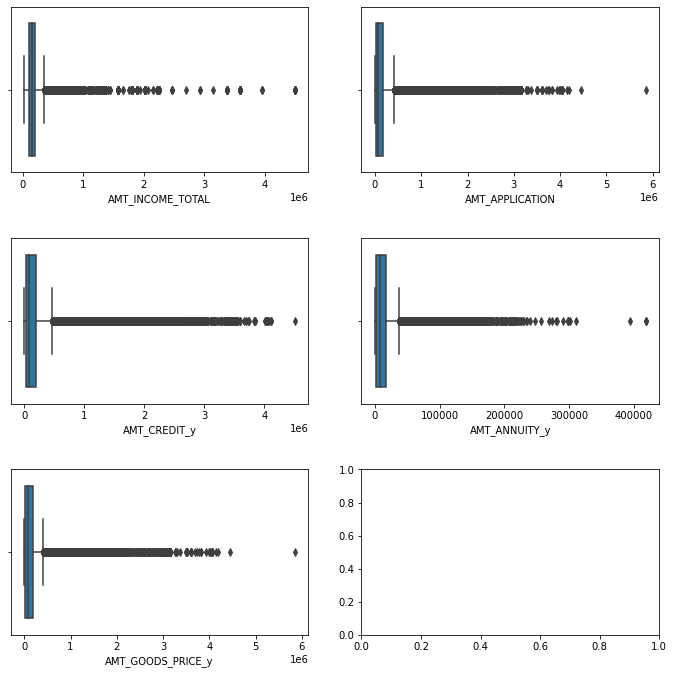

In [55]:
fig,axes =plt.subplots(3,2,figsize=(10,10))
sns.boxplot("AMT_INCOME_TOTAL",data =Final_Data,ax=axes[0,0])
sns.boxplot("AMT_APPLICATION",data =Final_Data,ax=axes[0,1])
sns.boxplot("AMT_CREDIT_y",data =Final_Data,ax=axes[1,0])
sns.boxplot("AMT_ANNUITY_y",data =Final_Data,ax=axes[1,1])
sns.boxplot("AMT_GOODS_PRICE_y",data =Final_Data,ax=axes[2,0])
fig. tight_layout(pad =3.0)

In [56]:
Final_Data[["AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]].head()

,AMT_APPLICATION,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y
0,179055.0,179055.0,9251.775,179055.0
1,900000.0,1035882.0,98356.995,900000.0
2,337500.0,348637.5,64567.665,337500.0
3,68809.5,68053.5,6737.310,68809.5
4,24282.0,20106.0,5357.250,24282.0


In [57]:
Final_Data[["AMT_INCOME_TOTAL","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]].describe()

,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y
count,1.334636e+06,1.334636e+06,1.334636e+06,1.334636e+06,1.334636e+06
mean,1.726969e+05,1.756473e+05,1.894188e+05,1.215177e+04,1.756741e+05
std,9.350291e+04,2.913092e+05,3.164248e+05,1.451061e+04,2.913324e+05
min,2.565000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.125000e+05,2.289600e+04,2.286000e+04,2.250000e+03,2.289983e+04
50%,1.575000e+05,7.320600e+04,7.486650e+04,8.007660e+03,7.321050e+04
75%,2.070000e+05,1.800000e+05,1.988786e+05,1.634117e+04,1.800000e+05
max,4.500000e+06,5.850000e+06,4.509688e+06,4.180581e+05,5.850000e+06


In [58]:
Amount = Final_Data[["AMT_INCOME_TOTAL","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]]

###### Calculating 3Standard devaitaion, to check values fall outside 3SD

In [59]:
Max = Amount.mean() + (3 * Amount.std())
Max

AMT_INCOME_TOTAL     4.532056e+05
AMT_APPLICATION      1.049575e+06
AMT_CREDIT_y         1.138693e+06
AMT_ANNUITY_y        5.568360e+04
AMT_GOODS_PRICE_y    1.049671e+06
dtype: float64

In [60]:
Min = Amount.mean() - (3 * Amount.std())
Min

AMT_INCOME_TOTAL    -107811.858544
AMT_APPLICATION     -698280.332027
AMT_CREDIT_y        -759855.489177
AMT_ANNUITY_y        -31380.066738
AMT_GOODS_PRICE_y   -698322.998914
dtype: float64

In [61]:
def Outlier_values(Amount,col):
    Outlier = []
    for x in Amount[col]:
        if x < Min[col] or x > Max[col]:
            Outlier.append(x)
    return Outlier

In [62]:
Income_outlier = Outlier_values(Amount,"AMT_INCOME_TOTAL")
App_Outlier = Outlier_values(Amount,"AMT_APPLICATION")
Credit_Outlier = Outlier_values(Amount,"AMT_CREDIT_y")
Annuity_Outlier = Outlier_values(Amount,"AMT_ANNUITY_y")
Goods_Outlier = Outlier_values(Amount,"AMT_GOODS_PRICE_y")

In [63]:
print("App_Outlier: ",len(App_Outlier))
print("Credit_Outlier: ",len(Credit_Outlier))
print("Annuity_Outlier: ",len(Annuity_Outlier))
print("Goods_Outlier: ",len(Goods_Outlier))

App_Outlier:  39938
Credit_Outlier:  37585
Annuity_Outlier:  24555
Goods_Outlier:  39938


In [64]:
y =[x for x in Income_outlier if x>=4500000]
print("AMT_INCOME_TOTAL",": ",y)
y =[x for x in App_Outlier if x>=5000000]
print("App_Outlier",": ",y)
y =[x for x in Credit_Outlier if x>=4500000]
print("Credit_Outlier",": ",y)
y =[x for x in Annuity_Outlier if x>=400000]
print("Annuity_Outlier",": ",y)
y =[x for x in Goods_Outlier if x>=5000000]
print("Goods_Outlier",": ",y)

AMT_INCOME_TOTAL :  [4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0, 4500000.0]
App_Outlier :  [5850000.0]
Credit_Outlier :  [4509688.5]
Annuity_Outlier :  [418058.145, 417927.645, 418058.145]
Goods_Outlier :  [5850000.0]


In [65]:
Final_Data.loc[Final_Data["AMT_APPLICATION"]>=5850000,["SK_ID_CURR","NAME_CONTRACT_STATUS","AMT_INCOME_TOTAL","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]].head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y
920658,346243,Approved,540000.0,5850000.0,4509688.5,113979.69,5850000.0


In [66]:
Final_Data.loc[Final_Data["AMT_INCOME_TOTAL"]>=4500000,["SK_ID_CURR","NAME_CONTRACT_STATUS","AMT_INCOME_TOTAL","AMT_APPLICATION","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]].head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_INCOME_TOTAL,AMT_APPLICATION,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y
812898,317748,Unused offer,4500000.0,91881.0,91881.0,0.000,91881.0
812899,317748,Approved,4500000.0,76320.0,84379.5,8176.365,76320.0
812900,317748,Approved,4500000.0,450000.0,681354.0,37937.790,450000.0
885466,337151,Canceled,4500000.0,0.0,0.0,0.000,0.0
885467,337151,Canceled,4500000.0,0.0,0.0,0.000,0.0


* Even though values fall outside 3 standard deviation, but most of the values are continuos and if we correlate AMT_APPLICATION, Credit, Good price we could see data is feasible.If we remove these values analysis would lean towards applicants acquired low income, So we are proceeding with existing values

# Univariate Analysis

Defaulters(1):  116363 , 8.718706823433505 %
Non-Defaulters(0):  1218273 , 91.28129317656649 %


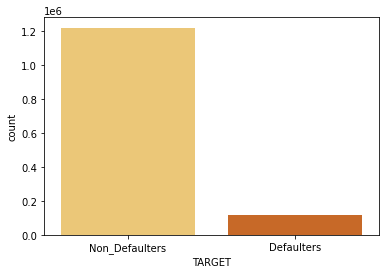

In [67]:
sns.countplot(Final_Data["TARGET"],palette="YlOrBr").set(xticklabels=["Non_Defaulters","Defaulters"])
print("Defaulters(1): ",Final_Data["TARGET"].value_counts()[1],",",(Final_Data["TARGET"].value_counts()[1]/len(Final_Data["TARGET"]))*100,"%")
print("Non-Defaulters(0): ",Final_Data["TARGET"].value_counts()[0],",",(Final_Data["TARGET"].value_counts()[0]/len(Final_Data["TARGET"]))*100,"%")

* Only 9% were Defaulters, we have to focus on this category

### Contract Details

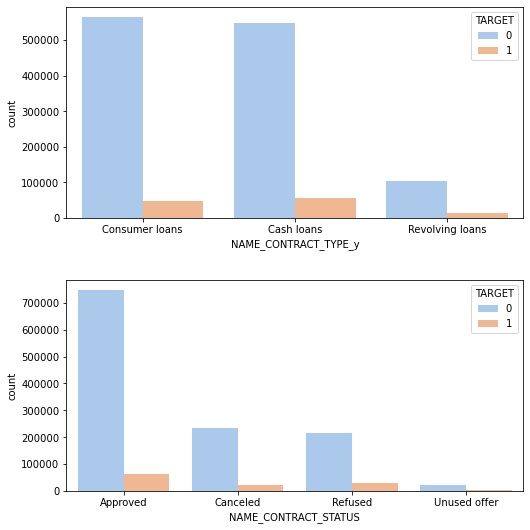

In [68]:
fig,axes =plt.subplots(2,1,figsize=(8,8))
sns.countplot(data =Final_Data,x="NAME_CONTRACT_TYPE_y",hue="TARGET",ax=axes[0],palette="pastel")
sns.countplot(data =Final_Data,x="NAME_CONTRACT_STATUS",hue="TARGET",ax=axes[1],palette="pastel")
fig.tight_layout(pad =3.0)

In [69]:
for i in Final_Data["NAME_CONTRACT_TYPE_y"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_CONTRACT_TYPE_y"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",(len(defaulters1)/Total)*100)

Consumer loans :   40.64780041765854
Cash loans :   47.70588589156347
Revolving loans :   11.646313690777998


In [70]:
for i in Final_Data["NAME_CONTRACT_STATUS"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_CONTRACT_STATUS"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",(len(defaulters1)/Total)*100)

Approved :   52.88708610125211
Canceled :   20.340658112974054
Refused :   25.16349698787415
Unused offer :   1.608758797899676


* Highest Applicants were from Consumer loans & Cash loans but Defaulters were quite high from Cash loan applicants.

* Highest risk with applicants whose loan application were Canceled & Refused in past.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

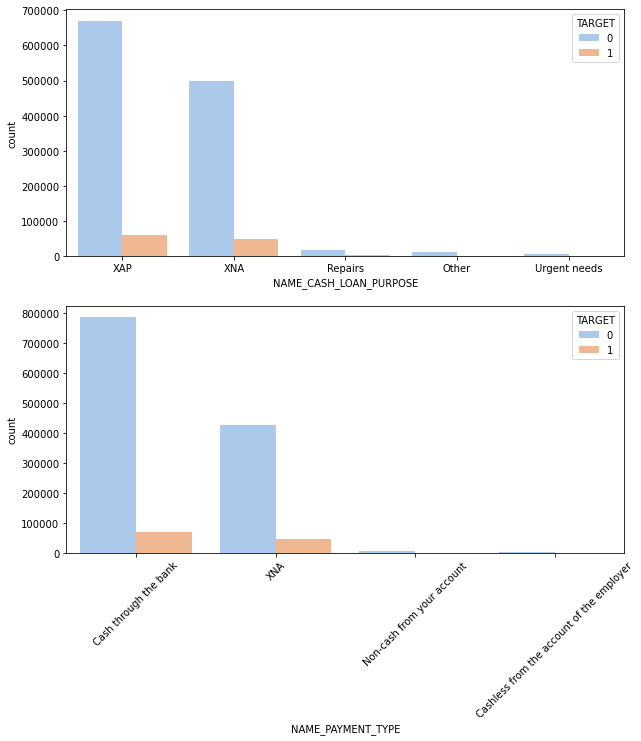

In [71]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data= Final_Data,x="NAME_CASH_LOAN_PURPOSE",hue="TARGET",order=Final_Data["NAME_CASH_LOAN_PURPOSE"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data =Final_Data,x="NAME_PAYMENT_TYPE",hue="TARGET",order=Final_Data["NAME_PAYMENT_TYPE"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel")
plt.xticks(rotation=45)

In [72]:
for i in Final_Data["NAME_CASH_LOAN_PURPOSE"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_CASH_LOAN_PURPOSE"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

XAP :   52.294
XNA :   41.258
Other :   1.373
Payments on other loans :   0.21
Buying a used car :   0.258
Repairs :   2.194
Buying a new car :   0.066
Everyday expenses :   0.179
Medicine :   0.212
Car repairs :   0.102
Urgent needs :   0.914
Buying a holiday home / land :   0.046
Building a house or an annex :   0.272
Furniture :   0.071
Journey :   0.092
Purchase of electronic equipment :   0.096
Wedding / gift / holiday :   0.079
Education :   0.115
Buying a home :   0.071
Business development :   0.039
Gasification / water supply :   0.037
Buying a garage :   0.006
Hobby :   0.008
Money for a third person :   0.003
Refusal to name the goal :   0.003


In [73]:
for i in Final_Data["NAME_PAYMENT_TYPE"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_PAYMENT_TYPE"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

XNA :   39.818
Cash through the bank :   59.625
Non-cash from your account :   0.494
Cashless from the account of the employer :   0.063


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

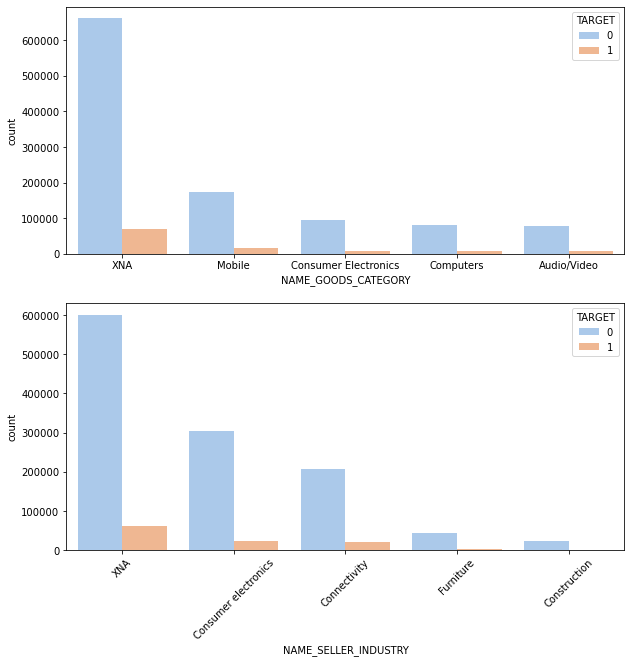

In [74]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data =Final_Data,x="NAME_GOODS_CATEGORY",hue="TARGET",order=Final_Data["NAME_GOODS_CATEGORY"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data= Final_Data,x="NAME_SELLER_INDUSTRY",hue="TARGET",order=Final_Data["NAME_SELLER_INDUSTRY"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel")
plt.xticks(rotation=45)

In [75]:
for i in Final_Data["NAME_GOODS_CATEGORY"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_GOODS_CATEGORY"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

Vehicles :   0.244
XNA :   59.918
Furniture :   2.24
Consumer Electronics :   6.243
Mobile :   14.108
Audio/Video :   5.549
Construction Materials :   1.263
Gardening :   0.133
Photo / Cinema Equipment :   1.408
Computers :   6.127
Clothing and Accessories :   0.939
Homewares :   0.239
Medical Supplies :   0.15
Other :   0.114
Jewelry :   0.393
Office Appliances :   0.139
Tourism :   0.048
Auto Accessories :   0.478
Sport and Leisure :   0.155
Medicine :   0.065
Weapon :   0.004
Direct Sales :   0.021
Fitness :   0.006
Insurance :   0.005
Additional Service :   0.006
Education :   0.004
Animals :   0.0


In [76]:
for i in Final_Data["NAME_SELLER_INDUSTRY"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_SELLER_INDUSTRY"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

Auto technology :   0.357
XNA :   54.08
Furniture :   2.507
Consumer electronics :   21.396
Connectivity :   18.069
Construction :   1.408
Clothing :   0.96
Industry :   1.005
Tourism :   0.014
Jewelry :   0.157
MLM partners :   0.047


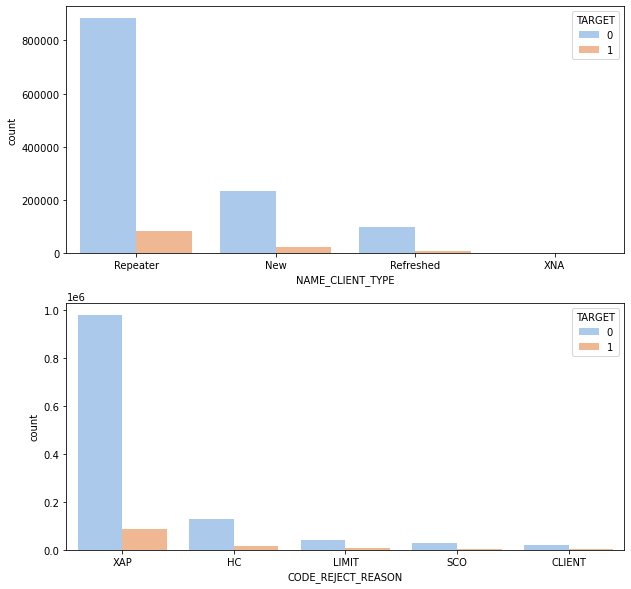

In [102]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data =Final_Data,x="NAME_CLIENT_TYPE",hue="TARGET",order=Final_Data["NAME_CLIENT_TYPE"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data= Final_Data,x="CODE_REJECT_REASON",hue="TARGET",order=Final_Data["CODE_REJECT_REASON"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel")

In [78]:
for i in Final_Data["NAME_CLIENT_TYPE"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_CLIENT_TYPE"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

New :   19.776
Repeater :   73.319
Refreshed :   6.776
XNA :   0.129


In [79]:
for i in Final_Data["CODE_REJECT_REASON"].unique():
    defaulters1 = Final_Data[(Final_Data["CODE_REJECT_REASON"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

XAP :   73.228
LIMIT :   5.134
HC :   14.635
SCO :   2.793
SCOFR :   1.946
VERIF :   0.245
CLIENT :   1.609
XNA :   0.375
SYSTEM :   0.036


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

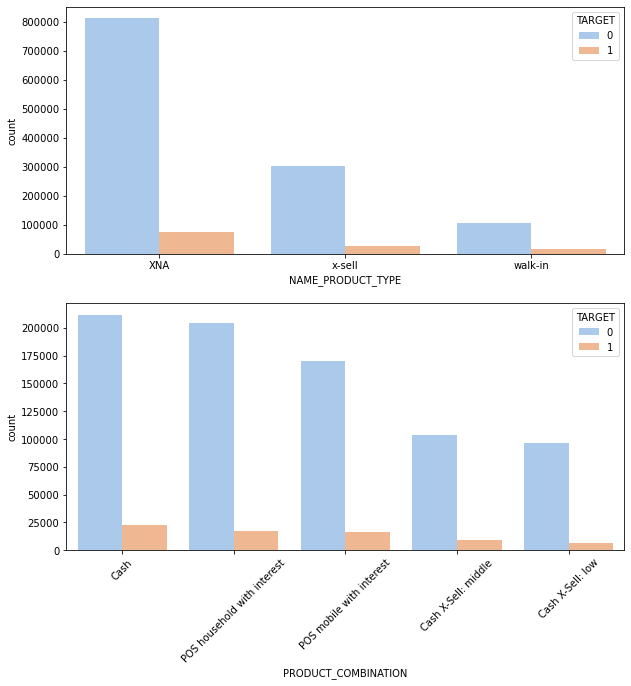

In [80]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data =Final_Data,x="NAME_PRODUCT_TYPE",hue="TARGET",order=Final_Data["NAME_PRODUCT_TYPE"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data= Final_Data,x="PRODUCT_COMBINATION",hue="TARGET",order=Final_Data["PRODUCT_COMBINATION"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel")
plt.xticks(rotation=45)

In [81]:
for i in Final_Data["NAME_PRODUCT_TYPE"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_PRODUCT_TYPE"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

XNA :   63.715
x-sell :   23.138
walk-in :   13.147


In [82]:
for i in Final_Data["PRODUCT_COMBINATION"].unique():
    defaulters1 = Final_Data[(Final_Data["PRODUCT_COMBINATION"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

POS other with interest :   1.39
Cash X-Sell: low :   5.931
POS industry with interest :   4.446
POS household with interest :   14.803
POS mobile without interest :   1.311
Card Street :   8.338
Card X-Sell :   3.309
Cash :   19.216
Cash Street: high :   4.884
Cash X-Sell: middle :   7.635
POS mobile with interest :   14.165
POS household without interest :   4.001
POS industry without interest :   0.406
Cash Street: low :   2.425
Cash X-Sell: high :   4.736
Cash Street: middle :   2.88
POS others without interest :   0.125


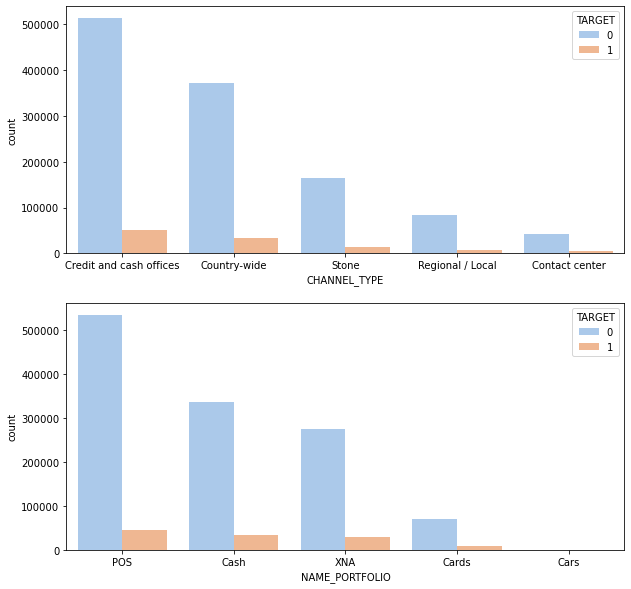

In [100]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data =Final_Data,x="CHANNEL_TYPE",hue="TARGET",order=Final_Data["CHANNEL_TYPE"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data= Final_Data,x="NAME_PORTFOLIO",hue="TARGET",order=Final_Data["NAME_PORTFOLIO"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel")

In [85]:
for i in Final_Data["CHANNEL_TYPE"].unique():
    defaulters1 = Final_Data[(Final_Data["CHANNEL_TYPE"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

Stone :   11.327
Credit and cash offices :   44.256
Country-wide :   28.772
Regional / Local :   5.859
AP+ (Cash loan) :   5.106
Channel of corporate sales :   0.287
Contact center :   4.378
Car dealer :   0.015


In [86]:
for i in Final_Data["NAME_PORTFOLIO"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_PORTFOLIO"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

POS :   38.112
Cash :   28.49
XNA :   25.588
Cards :   7.795
Cars :   0.015


[[Text(0, 0, 'Insurance not requested'), Text(0, 0, 'Insurance requested')]]

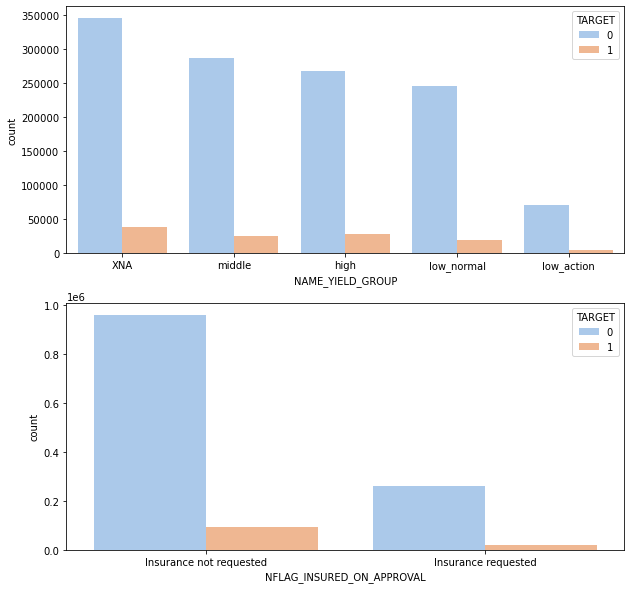

In [88]:
fig,axes =plt.subplots(2,1,figsize=(10,10))
sns.countplot(data =Final_Data,x="NAME_YIELD_GROUP",hue="TARGET",order=Final_Data["NAME_YIELD_GROUP"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[0],palette="pastel")
sns.countplot(data= Final_Data,x="NFLAG_INSURED_ON_APPROVAL",hue="TARGET",order=Final_Data["NFLAG_INSURED_ON_APPROVAL"].value_counts().sort_values(ascending = False).iloc[:5].index,ax=axes[1],palette="pastel").set(xticklabels=["Insurance not requested","Insurance requested"])

In [89]:
for i in Final_Data["NAME_YIELD_GROUP"].unique():
    defaulters1 = Final_Data[(Final_Data["NAME_YIELD_GROUP"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

low_normal :   16.321
middle :   21.687
XNA :   33.383
high :   24.353
low_action :   4.256


In [90]:
for i in Final_Data["NFLAG_INSURED_ON_APPROVAL"].unique():
    defaulters1 = Final_Data[(Final_Data["NFLAG_INSURED_ON_APPROVAL"] == i) & (Final_Data["TARGET"] ==1)]
    Total = len(Final_Data[Final_Data["TARGET"] ==1])
    print(i,":  ",round((len(defaulters1)/Total)*100,3))

0.0 :   81.647
1.0 :   18.353


In [ ]:
#NAME_PAYMENT_TYPE ,CODE_REJECT_REASON, NAME_CLIENT_TYPE , CHANNEL_TYPE, NAME_SELLER_INDUSTRY,

#NAME_YIELD_GROUP , PRODUCT_COMBINATION , NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE

#DAYS_FIRST_DRAWING , DAYS_FIRST_DUE , DAYS_LAST_DUE  ,DAYS_TERMINATION , DAYS_DECISION , NFLAG_INSURED_ON_APPROVAL

#AMT_ANNUITY , AMT_APPLICATION , AMT_CREDIT , AMT_GOODS_PRICE

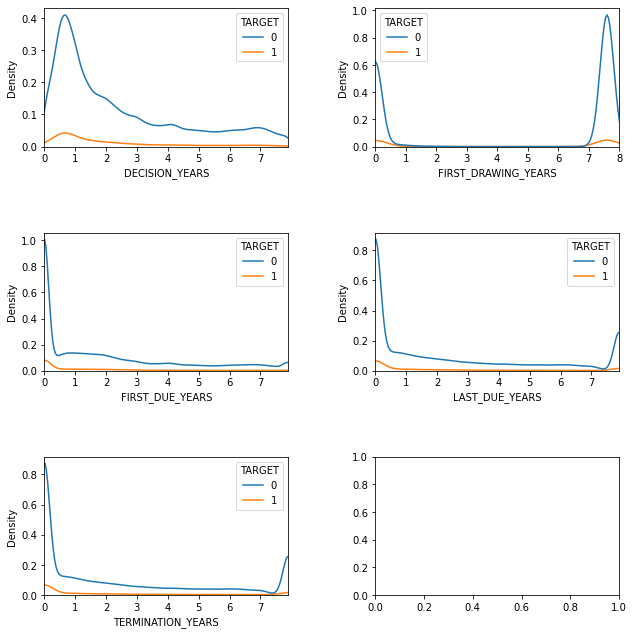

In [91]:
fig,ax =plt.subplots(3,2,figsize=(10,10))
sns.kdeplot(Final_Data['DECISION_YEARS'],hue=Final_Data["TARGET"],ax=ax[0,0]).set(xlim=(0,7.9))
sns.kdeplot(Final_Data['FIRST_DRAWING_YEARS'],hue=Final_Data["TARGET"],ax=ax[0,1]).set(xlim=(0,8.0))
sns.kdeplot(Final_Data['FIRST_DUE_YEARS'],hue=Final_Data["TARGET"],ax=ax[1,0]).set(xlim=(0,7.9))
sns.kdeplot(Final_Data['LAST_DUE_YEARS'],hue=Final_Data["TARGET"],ax=ax[1,1]).set(xlim=(0,7.9))
sns.kdeplot(Final_Data['TERMINATION_YEARS'],hue=Final_Data["TARGET"],ax=ax[2,0]).set(xlim=(0,7.9))
fig.tight_layout(pad =5.0)

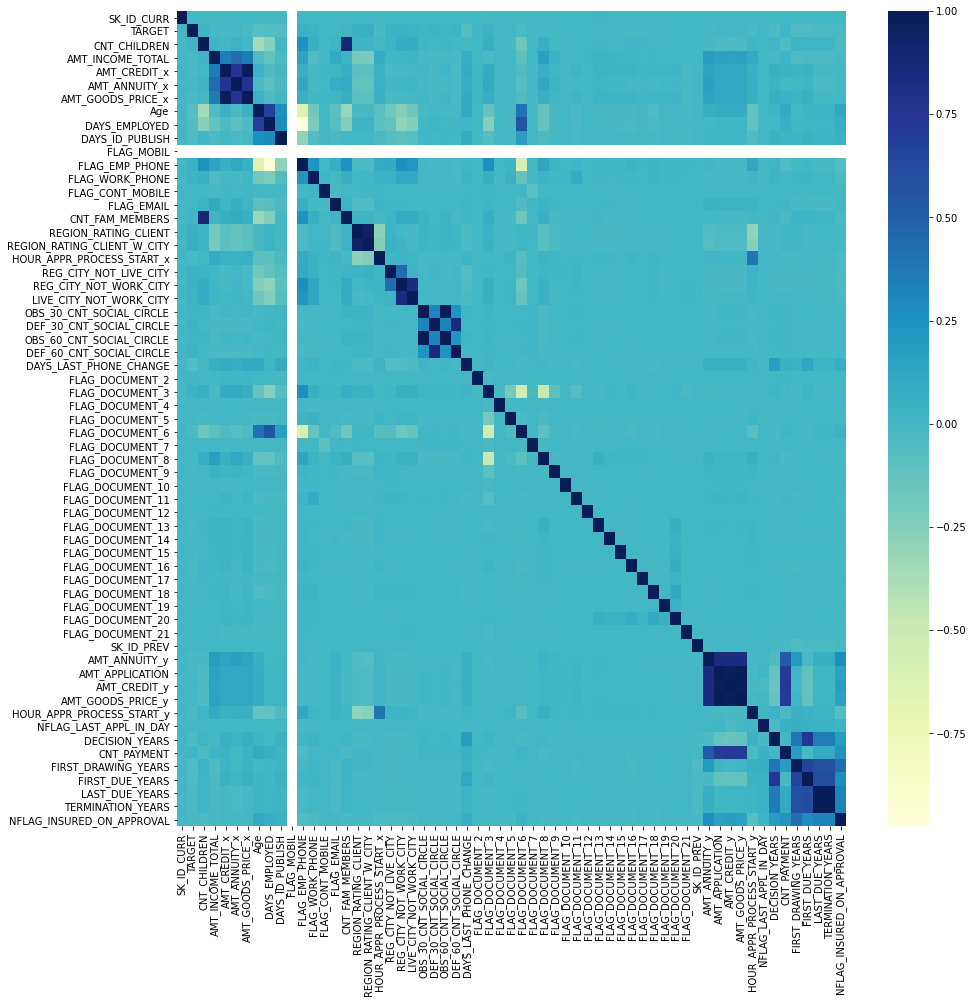

In [92]:
plt.figure(figsize=(15,15))
sns.heatmap(Final_Data.corr(), cmap="YlGnBu")

### Bi-Variate Analysis

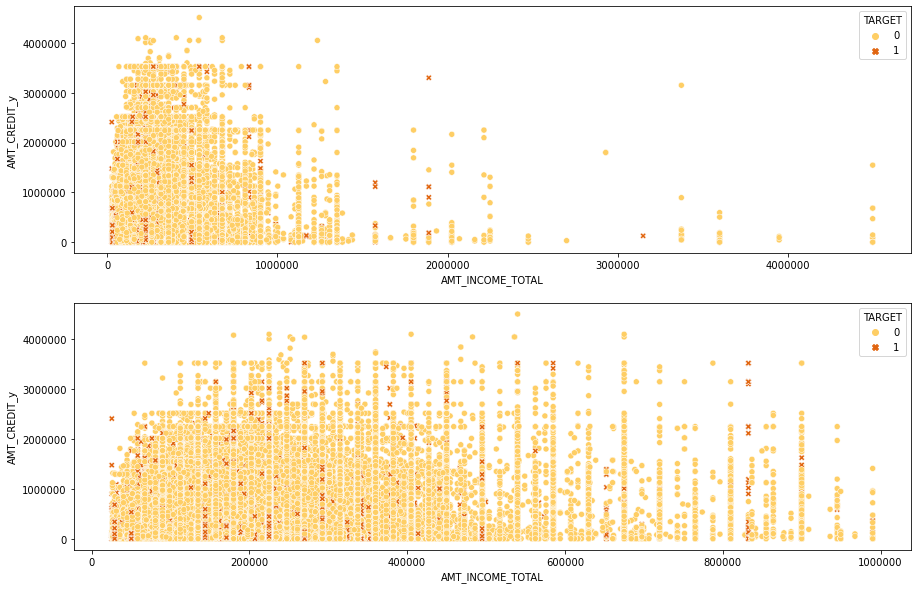

In [93]:
fig,ax =plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data=Final_Data, x="AMT_INCOME_TOTAL", y="AMT_CREDIT_y",hue ="TARGET",ax=ax[0],style="TARGET",palette="YlOrBr")
Inc =Final_Data.loc[Final_Data["AMT_INCOME_TOTAL"]<1000000,["AMT_INCOME_TOTAL","TARGET","AMT_CREDIT_y"]]
sns.scatterplot(data=Inc, x="AMT_INCOME_TOTAL", y="AMT_CREDIT_y",hue ="TARGET",ax=ax[1],style="TARGET",palette="YlOrBr")
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

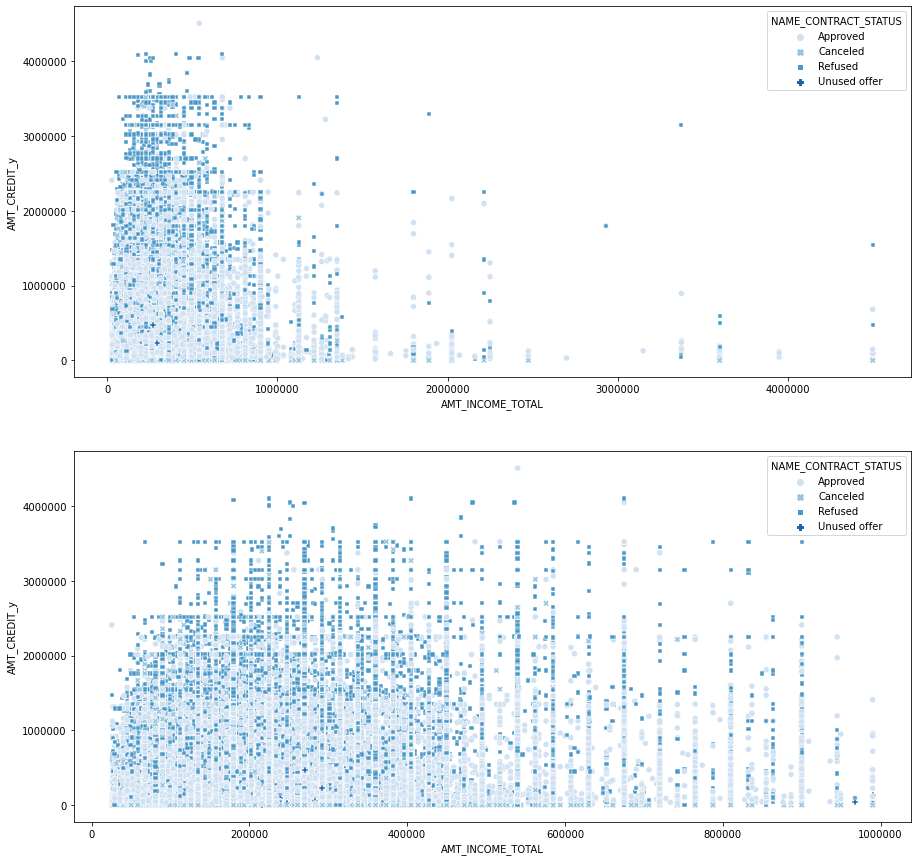

In [94]:
fig,ax =plt.subplots(2,1,figsize=(15,15))
sns.scatterplot(data=Final_Data, x="AMT_INCOME_TOTAL", y="AMT_CREDIT_y",hue ="NAME_CONTRACT_STATUS",ax=ax[0],style="NAME_CONTRACT_STATUS",palette="Blues")
Inc =Final_Data.loc[Final_Data["AMT_INCOME_TOTAL"]<1000000,["AMT_INCOME_TOTAL","NAME_CONTRACT_STATUS","AMT_CREDIT_y"]]
sns.scatterplot(data=Inc, x="AMT_INCOME_TOTAL", y="AMT_CREDIT_y",hue ="NAME_CONTRACT_STATUS",ax=ax[1],style="NAME_CONTRACT_STATUS",palette="Blues")
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

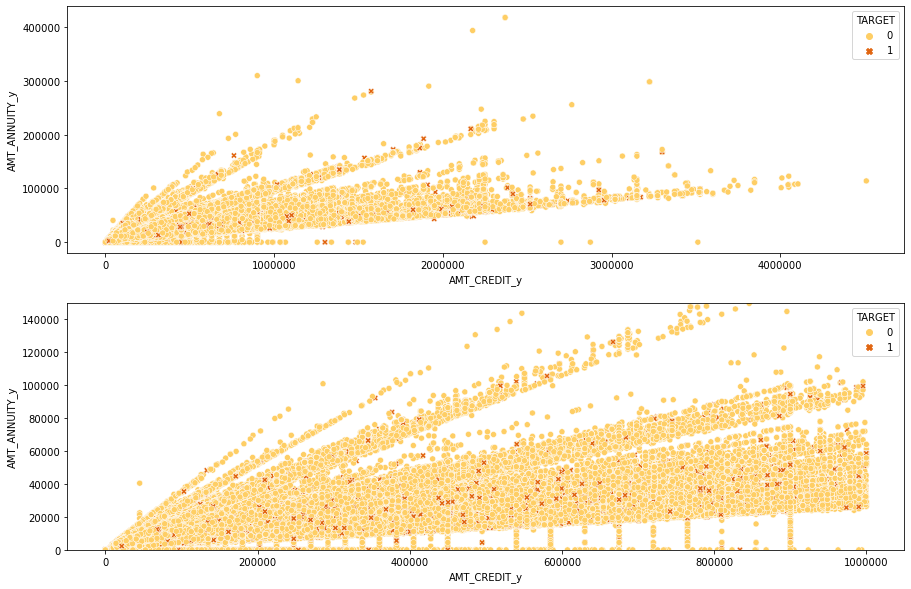

In [95]:
fig,ax =plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data=Final_Data, x="AMT_CREDIT_y", y="AMT_ANNUITY_y",hue ="TARGET",ax=ax[0],style="TARGET",palette="YlOrBr")
Inc =Final_Data.loc[Final_Data["AMT_CREDIT_y"]<1000000,["AMT_CREDIT_y","TARGET","AMT_ANNUITY_y"]]
sns.scatterplot(data=Inc, x="AMT_CREDIT_y", y="AMT_ANNUITY_y",hue ="TARGET",ax=ax[1],style="TARGET",palette="YlOrBr").set(ylim=(0,150000))
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

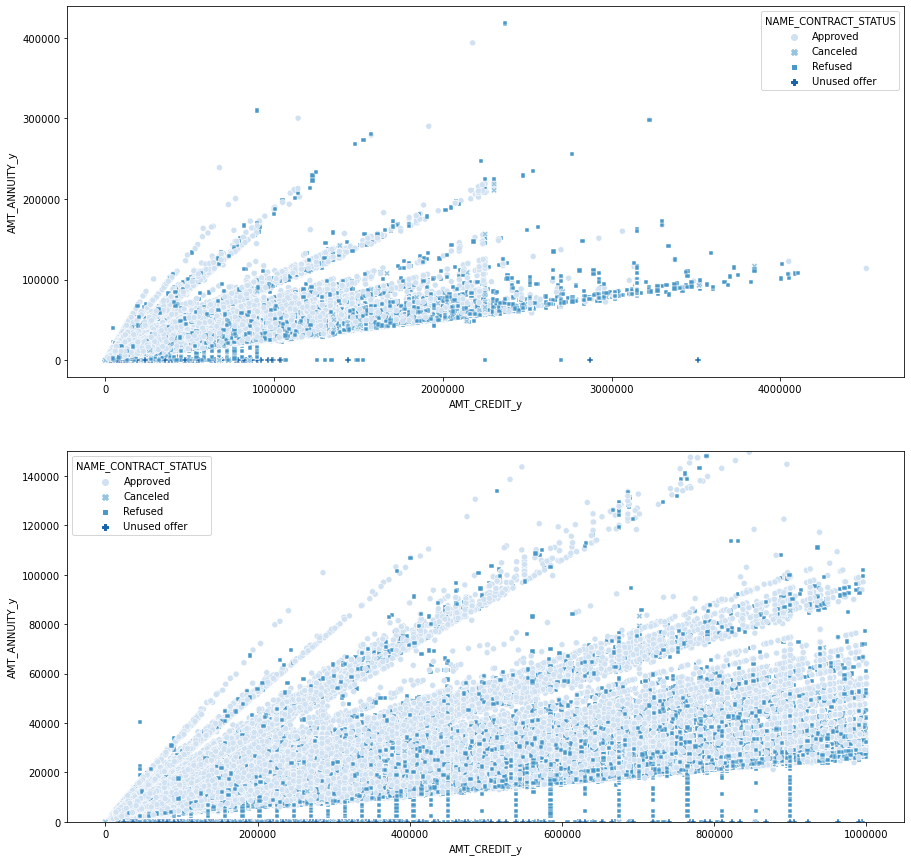

In [96]:
fig,ax =plt.subplots(2,1,figsize=(15,15))
sns.scatterplot(data=Final_Data, x="AMT_CREDIT_y", y="AMT_ANNUITY_y",hue ="NAME_CONTRACT_STATUS",ax=ax[0],style="NAME_CONTRACT_STATUS",palette="Blues")
Inc =Final_Data.loc[Final_Data["AMT_CREDIT_y"]<1000000,["AMT_ANNUITY_y","NAME_CONTRACT_STATUS","AMT_CREDIT_y"]]
sns.scatterplot(data=Inc, x="AMT_CREDIT_y", y="AMT_ANNUITY_y",hue ="NAME_CONTRACT_STATUS",ax=ax[1],style="NAME_CONTRACT_STATUS",palette="Blues").set(ylim=(0,150000))
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

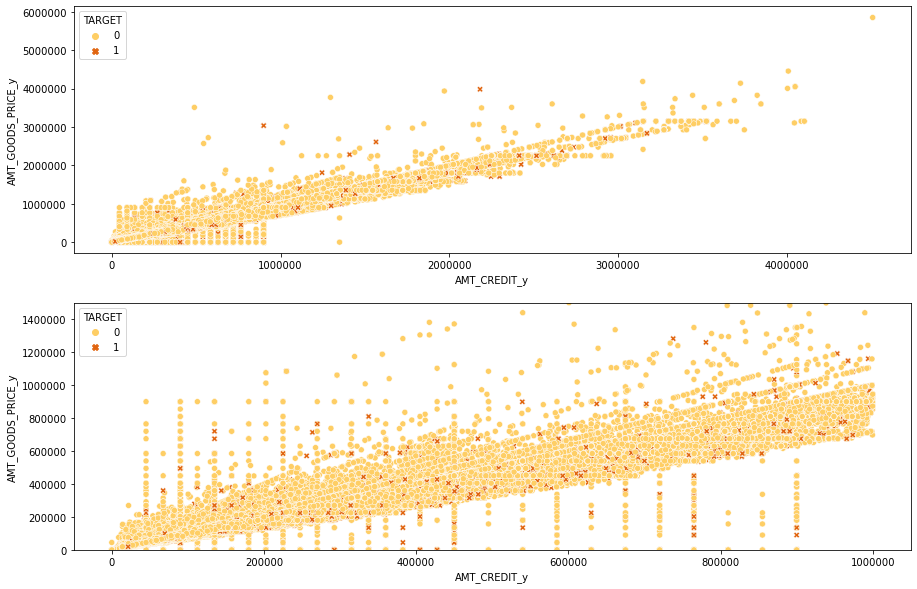

In [97]:
fig,ax =plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data=Final_Data, x="AMT_CREDIT_y", y="AMT_GOODS_PRICE_y",hue ="TARGET",ax=ax[0],style="TARGET",palette="YlOrBr")
Inc =Final_Data.loc[Final_Data["AMT_CREDIT_y"]<1000000,["AMT_CREDIT_y","TARGET","AMT_GOODS_PRICE_y"]]
sns.scatterplot(data=Inc, x="AMT_CREDIT_y", y="AMT_GOODS_PRICE_y",hue ="TARGET",ax=ax[1],style="TARGET",palette="YlOrBr").set(ylim=(0,1500000))
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

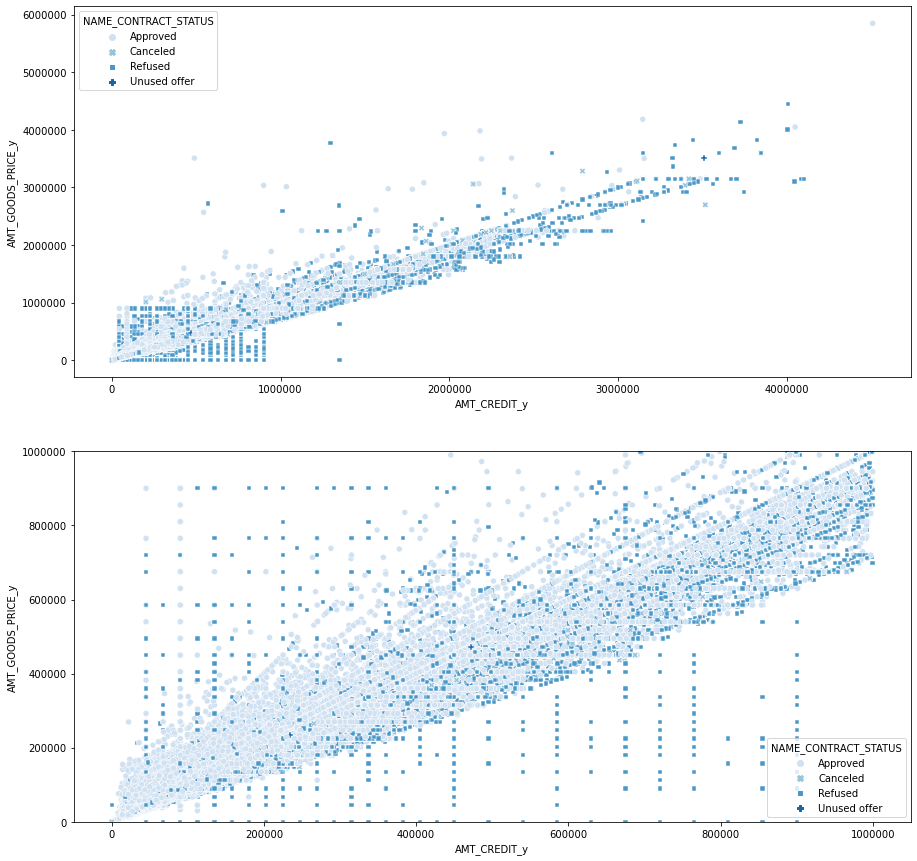

In [98]:
fig,ax =plt.subplots(2,1,figsize=(15,15))
sns.scatterplot(data=Final_Data, x="AMT_CREDIT_y", y="AMT_GOODS_PRICE_y",hue ="NAME_CONTRACT_STATUS",ax=ax[0],style="NAME_CONTRACT_STATUS",palette="Blues")
Inc =Final_Data.loc[Final_Data["AMT_CREDIT_y"]<1000000,["AMT_GOODS_PRICE_y","NAME_CONTRACT_STATUS","AMT_CREDIT_y"]]
sns.scatterplot(data=Inc, x="AMT_CREDIT_y", y="AMT_GOODS_PRICE_y",hue ="NAME_CONTRACT_STATUS",ax=ax[1],style="NAME_CONTRACT_STATUS",palette="Blues").set(ylim=(0,1000000))
for ax in fig.axes:
    plt.sca(ax)
    plt.ticklabel_format(style='plain', axis='both')

## Conclusion:


9% were Defaulters out of 1.3 Million Applications.

Data_Discrepancies:

* Lot of columns has 'XAP', 'XNA' other unique codes didnt find any particular meaning for it, But our Analysis Continued with those deafult values.
* The columns with Time line data has 1000 years as maximum which was imputed with 2nd highest value in columns as removing those columns will reduce the record count for our analysis.
* 4 Columns has missing data of about 50%, as the values dynamic they were removed from our anlysis.

Findings:

* Highest Applicants were from Consumer loans & Cash loans but Defaulters were quite high from Cash loan applicants.
* Highest risk with applicants whose loan application were Canceled & Refused in past.Low priority should be gievn to the customers who refused offers more than 2 times.
* Highest Risk with Applicants who requested loan for Everyday expenses,Mobile,Refusal to name the goal and Medicine only if they dont have insurance.
* Defaulters were high in Cash,POS mobile with interest,POS household with interest,Card Street.
* Applicants who obtained lan through Cash,POS were facing difficulty in paying.
* Highest deafuters were in insurance requested applicants rather than non-insured.
* Many clients were from Stone,Credit and cash offices,Country-wide Channels.

In [99]:
Final_Data.to_csv("Final_data.csv",index=False)